# 35 - Simpson's Paradox

**Key Idea:** Sometimes a trend appears in every group, but disappears (or even reverses!) when you combine them all.

**Why it happens:** Groups have different sizes or different baseline rates. When combined, the overall pattern can fool you.

**Lesson:** Always check subgroups before making conclusions!

## Baseball Example: Batting Averages

Team A has a higher batting average than Team B in both April and May. But when we combine the months, Team B has a higher average overall. How is that possible?

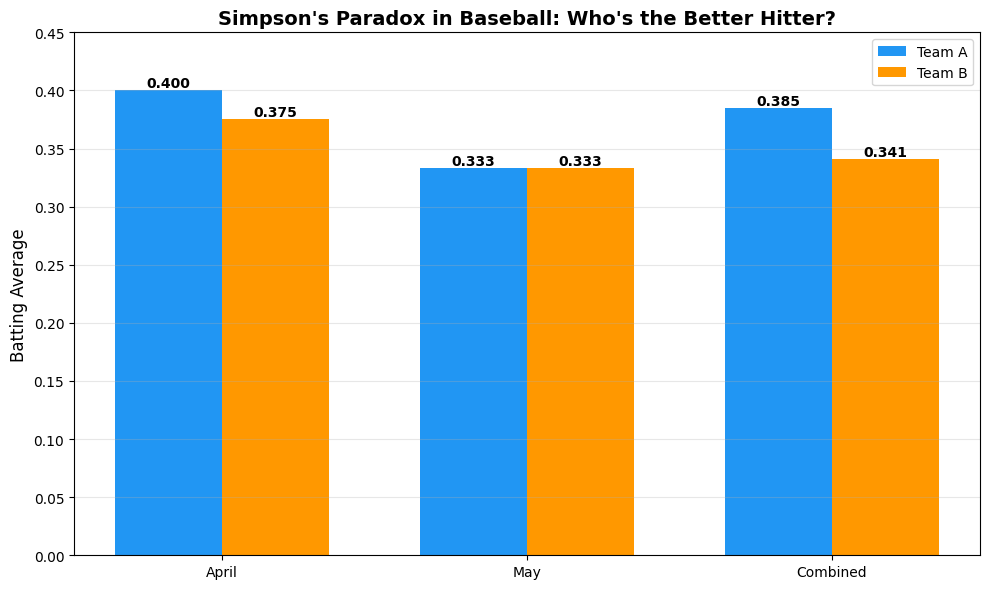


📊 Team A Performance:
   April: 0.400 (40/100) ✅ Better than Team B
   May: 0.333 (10/30) ✅ Better than Team B
   Combined: 0.385 (50/130)

📊 Team B Performance:
   April: 0.375 (15/40)
   May: 0.333 (60/180)
   Combined: 0.341 (75/220) ✅ Better overall!

🤯 THE PARADOX:
   → Team A wins both months separately
   → But Team B wins overall!

💡 Why? Team B played way more games in May (when both teams hit .333)
   Their high volume in May dragged down Team A's strong April performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Team A and Team B batting data
# Format: [hits, at_bats]
team_a_april = [40, 100]  # 40 hits out of 100 at-bats = .400
team_a_may = [10, 30]     # 10 hits out of 30 at-bats = .333

team_b_april = [15, 40]   # 15 hits out of 40 at-bats = .375
team_b_may = [60, 180]    # 60 hits out of 180 at-bats = .333

# Calculate batting averages
a_april_avg = team_a_april[0] / team_a_april[1]
a_may_avg = team_a_may[0] / team_a_may[1]
a_combined_avg = (team_a_april[0] + team_a_may[0]) / (team_a_april[1] + team_a_may[1])

b_april_avg = team_b_april[0] / team_b_april[1]
b_may_avg = team_b_may[0] / team_b_may[1]
b_combined_avg = (team_b_april[0] + team_b_may[0]) / (team_b_april[1] + team_b_may[1])

# Visualize
months = ['April', 'May', 'Combined']
team_a_avgs = [a_april_avg, a_may_avg, a_combined_avg]
team_b_avgs = [b_april_avg, b_may_avg, b_combined_avg]

x = np.arange(len(months))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, team_a_avgs, width, label='Team A', color='#2196F3')
bars2 = ax.bar(x + width/2, team_b_avgs, width, label='Team B', color='#FF9800')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Batting Average', fontsize=12)
ax.set_title('Simpson\'s Paradox in Baseball: Who\'s the Better Hitter?', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()
ax.set_ylim(0, 0.45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Team A Performance:")
print(f"   April: {a_april_avg:.3f} ({team_a_april[0]}/{team_a_april[1]}) ✅ Better than Team B")
print(f"   May: {a_may_avg:.3f} ({team_a_may[0]}/{team_a_may[1]}) ✅ Better than Team B")
print(f"   Combined: {a_combined_avg:.3f} ({team_a_april[0] + team_a_may[0]}/{team_a_april[1] + team_a_may[1]})")

print("\n📊 Team B Performance:")
print(f"   April: {b_april_avg:.3f} ({team_b_april[0]}/{team_b_april[1]})")
print(f"   May: {b_may_avg:.3f} ({team_b_may[0]}/{team_b_may[1]})")
print(f"   Combined: {b_combined_avg:.3f} ({team_b_april[0] + team_b_may[0]}/{team_b_april[1] + team_b_may[1]}) ✅ Better overall!")

print("\n🤯 THE PARADOX:")
print("   → Team A wins both months separately")
print("   → But Team B wins overall!")
print("\n💡 Why? Team B played way more games in May (when both teams hit .333)")
print("   Their high volume in May dragged down Team A's strong April performance.")

## Real-World Example: Hospital Death Rates

Hospital A has a higher overall death rate than Hospital B. But when we separate patients by severity (mild vs. severe cases), Hospital A has a LOWER death rate for both groups!

**The catch:** Hospital A treats more severe cases overall, so their combined rate looks worse even though they're actually better at treating both types of patients.

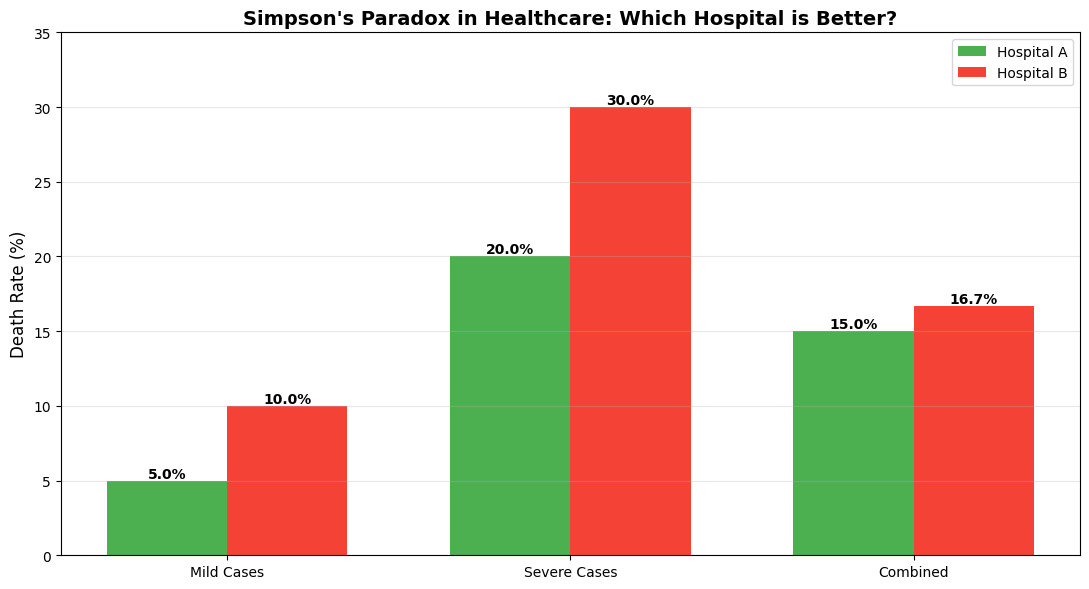


🏥 Hospital A Performance:
   Mild cases: 5.0% death rate (5/100) ✅ Better than Hospital B
   Severe cases: 20.0% death rate (40/200) ✅ Better than Hospital B
   Combined: 15.0% death rate (45/300)

🏥 Hospital B Performance:
   Mild cases: 10.0% death rate (20/200)
   Severe cases: 30.0% death rate (30/100)
   Combined: 16.7% death rate (50/300) ✅ Better overall!

🤯 THE PARADOX:
   → Hospital A has LOWER death rates for both mild AND severe cases
   → But Hospital B has LOWER overall death rate!

💡 Why? Hospital A treats more severe cases (200 vs 100)
   Since severe cases have higher death rates, this makes their overall rate look worse.

⚠️ WARNING: If you only looked at combined data, you'd choose the WRONG hospital!


In [2]:
# Hospital data: [deaths, total_patients]
# Hospital A
hosp_a_mild = [5, 100]      # 5 deaths out of 100 mild cases = 5% death rate
hosp_a_severe = [40, 200]   # 40 deaths out of 200 severe cases = 20% death rate

# Hospital B
hosp_b_mild = [20, 200]     # 20 deaths out of 200 mild cases = 10% death rate
hosp_b_severe = [30, 100]   # 30 deaths out of 100 severe cases = 30% death rate

# Calculate death rates
a_mild_rate = hosp_a_mild[0] / hosp_a_mild[1] * 100
a_severe_rate = hosp_a_severe[0] / hosp_a_severe[1] * 100
a_combined_rate = (hosp_a_mild[0] + hosp_a_severe[0]) / (hosp_a_mild[1] + hosp_a_severe[1]) * 100

b_mild_rate = hosp_b_mild[0] / hosp_b_mild[1] * 100
b_severe_rate = hosp_b_severe[0] / hosp_b_severe[1] * 100
b_combined_rate = (hosp_b_mild[0] + hosp_b_severe[0]) / (hosp_b_mild[1] + hosp_b_severe[1]) * 100

# Visualize
categories = ['Mild Cases', 'Severe Cases', 'Combined']
hosp_a_rates = [a_mild_rate, a_severe_rate, a_combined_rate]
hosp_b_rates = [b_mild_rate, b_severe_rate, b_combined_rate]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(11, 6))
bars1 = ax.bar(x - width/2, hosp_a_rates, width, label='Hospital A', color='#4CAF50')
bars2 = ax.bar(x + width/2, hosp_b_rates, width, label='Hospital B', color='#F44336')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Death Rate (%)', fontsize=12)
ax.set_title('Simpson\'s Paradox in Healthcare: Which Hospital is Better?', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 35)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🏥 Hospital A Performance:")
print(f"   Mild cases: {a_mild_rate:.1f}% death rate ({hosp_a_mild[0]}/{hosp_a_mild[1]}) ✅ Better than Hospital B")
print(f"   Severe cases: {a_severe_rate:.1f}% death rate ({hosp_a_severe[0]}/{hosp_a_severe[1]}) ✅ Better than Hospital B")
print(f"   Combined: {a_combined_rate:.1f}% death rate ({hosp_a_mild[0] + hosp_a_severe[0]}/{hosp_a_mild[1] + hosp_a_severe[1]})")

print("\n🏥 Hospital B Performance:")
print(f"   Mild cases: {b_mild_rate:.1f}% death rate ({hosp_b_mild[0]}/{hosp_b_mild[1]})")
print(f"   Severe cases: {b_severe_rate:.1f}% death rate ({hosp_b_severe[0]}/{hosp_b_severe[1]})")
print(f"   Combined: {b_combined_rate:.1f}% death rate ({hosp_b_mild[0] + hosp_b_severe[0]}/{hosp_b_mild[1] + hosp_b_severe[1]}) ✅ Better overall!")

print("\n🤯 THE PARADOX:")
print("   → Hospital A has LOWER death rates for both mild AND severe cases")
print("   → But Hospital B has LOWER overall death rate!")

print("\n💡 Why? Hospital A treats more severe cases (200 vs 100)")
print("   Since severe cases have higher death rates, this makes their overall rate look worse.")
print("\n⚠️ WARNING: If you only looked at combined data, you'd choose the WRONG hospital!")

## Key Takeaways

**Simpson's Paradox teaches us:**
- ✅ **Always examine subgroups** before drawing conclusions
- ✅ **Combined data can be misleading** when groups have different sizes or characteristics
- ✅ **Context matters** - the full story is often hidden in the details

**In predictive analytics:**
- Don't just look at overall averages or rates
- Segment your data by relevant categories (severity, time period, demographics)
- A trend that's true for every subgroup might reverse when combined!

**Real-world impact:**
- Medical decisions: Which treatment is better?
- Hiring: Is there discrimination in hiring rates?
- Marketing: Which campaign performs better?
- Sports: Who's the better player?

**→ When in doubt, break it down and look at the subgroups!**